# CSC 593

## Week 10

### Preparation for the last two weeks of class

Open a Terminal (Mac) or an Anaconda PowerShell Prompt `scikit-image` (might already be there) and `voila`:

```
conda install scikit-image
conda install -c conda-forge voila```

In [1]:
#### LOAD PACKAGES 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

### Linear Regression Analysis

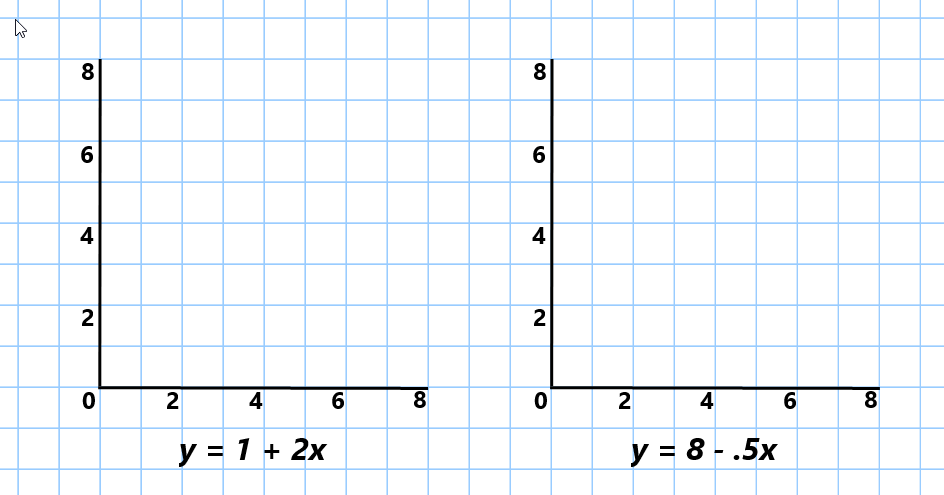

**Rate**: Internet Movie Database user rating (out of 10)  
**User**: Internet Movie Database users rating the movie (in thousands)  
**Meta**: “metascore” based on 35 critic reviews (out of 100)  
**Len**: runtime (in minutes)  
**Win**: award wins  
**Nom**: award nominations  

In [2]:
movies = pd.read_csv('../data/movies.csv')
movies.head()

,Movie,Box,Rate,User,Meta,Len,Win,Nom,Animated,Superhero
0,Star Wars: Episode IV - A New Hope (1977),460.935665,8.8,423.838,91,121,36,22,0,0
1,Toy Story 3 (2010),414.984497,8.5,201.748,92,103,35,41,1,0
2,Spider-Man 2 (2004),373.377893,7.5,191.179,83,127,15,39,0,1
3,Finding Nemo (2003),339.714367,8.1,263.202,89,100,35,36,1,0
4,The Lion King (1994),328.423001,8.3,233.977,83,89,27,22,1,0


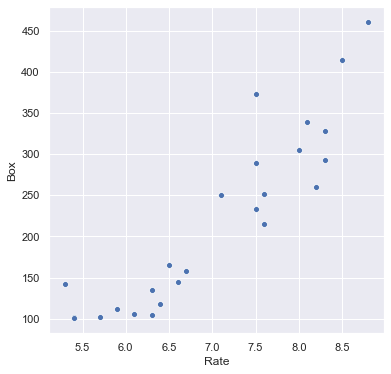

In [4]:
plt.figure(figsize=(6,6))
sns.scatterplot('Rate', 'Box', data=movies)
plt.show()

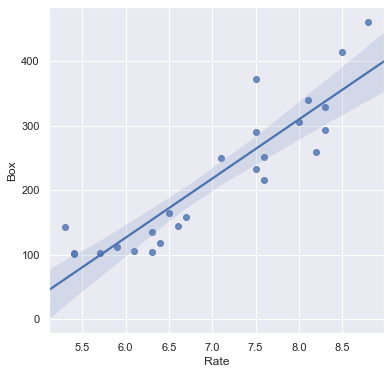

In [5]:
plt.figure(figsize=(6,6))
sns.regplot('Rate', 'Box', data=movies)
plt.show()

In [6]:
x = sm.add_constant(movies[['Rate']])
y = movies.Box

lm = sm.OLS(y, x).fit()

# Residual Sum of Squares
RSS = sum(lm.resid ** 2)

# Total Sum of Squares
TSS = sum((movies.Box - np.mean(movies.Box)) ** 2)
R2 = 1 - (RSS/TSS)

#print('RSS: {}; TSS: {}; R-squared: {}'.format(RSS, TSS, R2))

lm.summary()

C:\Users\Rachel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Box   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     104.5
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           5.02e-10
Time:                        16:10:46   Log-Likelihood:                -130.74
No. Observations:                  25   AIC:                             265.5
Df Residuals:                      23   BIC:                             267.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -424.4037     63.751     -6.657      0.000    -556.282    -292.526
Rate          91.7831      8.976     10.225      0.000      73.214     110.352
==============================================================================
Omnibus:                        2.759   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                2.164
Skew:                           0.711   Prob(JB):                        0.339
Kurtosis:                       2.764   Cond. No.                         49.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Box(Rate) = -424.4037 + 91.7831Rate**

<Figure size 432x432 with 0 Axes>

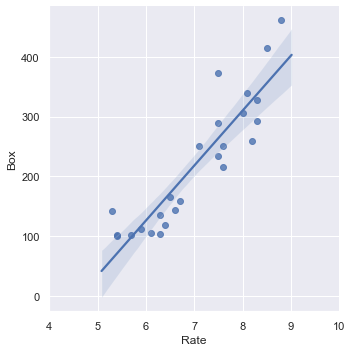

In [7]:
plt.figure(figsize=(6,6))
sns.lmplot('Rate', 'Box', data=movies)
plt.xlim(4,10)
plt.show()

#### Practice

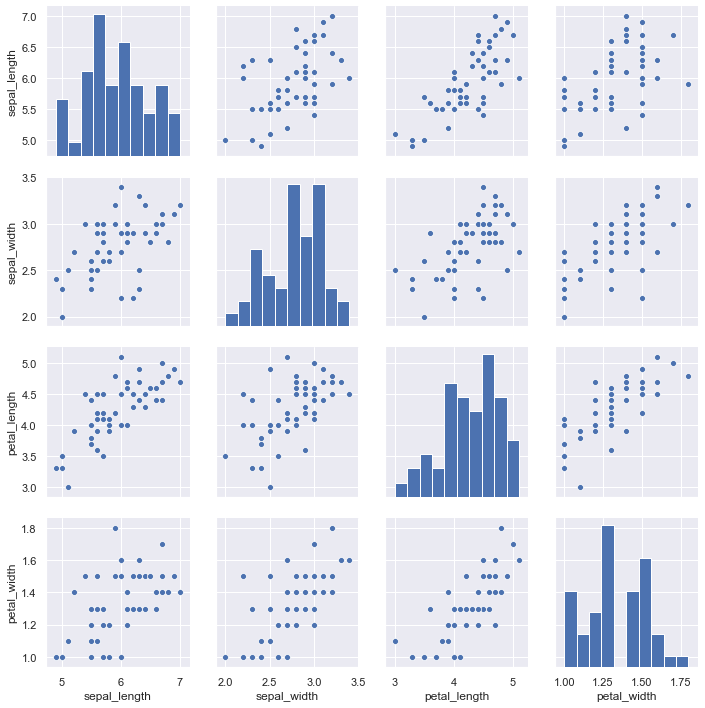

In [9]:
iris = sns.load_dataset('iris')
iris = iris[iris.species=='versicolor']
sns.pairplot(iris)
plt.show()

In [31]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


Choose a likely pair of variables from the scatterplot matrix above and create a simple model using sm.OLS (call it `lmprac`). Print the model's `.summary()` and write the linear function for the model.

In [19]:
x = sm.add_constant(iris.sepal_length)
y = iris.petal_length

lmprac = sm.OLS(y, x).fit()

In [20]:
# Residual Sum of Squares
RSS = sum(lmprac.resid ** 2)

# Total Sum of Squares
TSS = sum((iris['petal_length'] - np.mean(iris['petal_length'])) ** 2)
R2 = 1 - (RSS/TSS)

print('RSS: {}; TSS: {}; R-squared: {}'.format(RSS, TSS, R2))

lmprac.summary()

RSS: 4.6678580182609215; TSS: 10.820000000000006; R-squared: 0.5685898319537044


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     63.26
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           2.59e-10
Time:                        16:29:33   Log-Likelihood:                -11.664
No. Observations:                  50   AIC:                             27.33
Df Residuals:                      48   BIC:                             31.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1851      0.514      0.360      0.720      -0.849       1.219
sepal_length     0.6865      0.086      7.954      0.000       0.513       0.860
==============================================================================
Omnibus:                        0.977   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                0.702
Skew:                           0.290   Prob(JB):                        0.704
Kurtosis:                       2.964   Cond. No.                         71.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Adding a predictor, more details

In [21]:
x = sm.add_constant(movies[['Rate', 'User']])
y = movies.Box

lm = sm.OLS(y, x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Box   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     74.15
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.67e-10
Time:                        16:32:18   Log-Likelihood:                -126.58
No. Observations:                  25   AIC:                             259.2
Df Residuals:                      22   BIC:                             262.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -229.0106     86.184     -2.657      0.014    -407.745     -50.276
Rate          54.9285     14.707      3.735      0.001      24.427      85.430
User           0.4472      0.152      2.951      0.007       0.133       0.762
==============================================================================
Omnibus:                        9.444   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                7.427
Skew:                           1.175   Prob(JB):                       0.0244
Kurtosis:                       4.268   Cond. No.                     1.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Box(Rate, User) = -229.0106 + 54.9285Rate + .4472User**

#### What matters here:

**P-values** (_P>|t|_ above; `pvalues`): How certain are we that this relationship is meaningful and useful?

In [22]:
print(lm.pvalues)
print()
print(lm.pvalues['Rate'])

const    0.014392
Rate     0.001149
User     0.007384
dtype: float64

0.0011492576343842423


**R-squared** (`.rsquared`):  How well does this model explain the data? What fraction of the variation in y is "explained" by the model?  
**Adjusted R-squared** (`.rsquared_adj`):**  R-squared, but "penalized" based on the number of predictors (more predictors &rarr; lower Adjusted R-squared).

In [23]:
print("R-squared: %2.2f%%" % (lm.rsquared*100))
print("Adjusted R-squared: %2.2f%%" % (lm.rsquared_adj * 100))

R-squared: 87.08%
Adjusted R-squared: 85.91%


**Predictions** (`.predict`, `.get_prediction()`): The model's predicted values  
**Residuals** (`.resid`): "Errors". The difference between the predictions and the actual numbers.

In [24]:
dir(lm)
print("All predictions:", lm.predict())

predict = lm.get_prediction((1, 10, 400))
print()
print("95% confidence interval:", predict.conf_int(alpha=.05))

predict.summary_frame()

All predictions: [443.91087311 328.10810679 268.45292707 333.620497   331.53603404
 369.54025109 326.57496567 260.78883002 306.41671348 253.22314918
 240.09829986 256.50351882 244.74644406 175.28985171 160.6329959
 161.84226596  73.51763923 135.18085978 153.02114413 115.63164816
 131.92187689 133.03507361 106.92896093 100.96126885  95.54171467]

95% confidence interval: [[448.16384895 550.16428954]]


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,499.164069,24.591775,448.163849,550.16429,400.418568,597.90957


**Assumptions**

Residuals should:

1. have a **mean close to zero** across the distribution;
2. have **constant variance** (the vertical spread of the points remains approximately constant across the graph); 
3. have an approximately **normal distribution**--points tend to be closer to zero on the y axis, with gradually fewer appearing farther away; 
4. appear **independent** of one another--they seem to be distributed randomly. You shouldn't see a relationship between your input variable(s) and the residuals.

These should be tested with residuals plotted against each predictor variable and the predicted values.

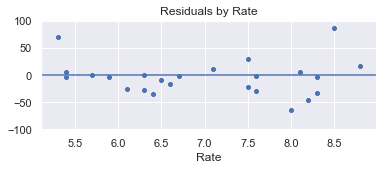

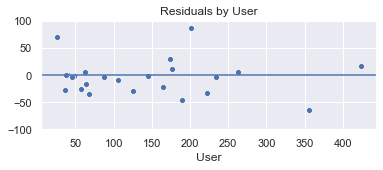

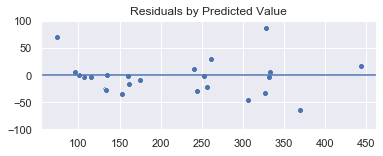

1.5847945178393274e-12


In [25]:
for x in ('Rate', 'User'):
    plt.figure(figsize=(6,2))
    sns.scatterplot(movies[x], lm.resid)
    plt.title("Residuals by %s" % x)
    plt.ylim(-100, 100)
    #Put a horizontal line through the mean of the predictions.
    plt.axhline(np.mean(lm.resid))
    plt.show()

plt.figure(figsize=(6,2))
sns.scatterplot(lm.predict(), lm.resid)
plt.title("Residuals by Predicted Value")
plt.ylim(-100, 100)
plt.axhline(np.mean(lm.resid))
plt.show()

print(np.mean(lm.resid))

#### Practice

Go back to `lmprac` from your last practice. Add a new variable from `iris` to the model, verify that the model is valid, and write the new linear function.

In [26]:
x = sm.add_constant(iris[['sepal_length','petal_width']])
y = iris.petal_length

lmprac2 = sm.OLS(y, x).fit()

In [27]:
lmprac2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     78.09
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.15e-15
Time:                        16:44:19   Log-Likelihood:                 3.9165
No. Observations:                  50   AIC:                            -1.833
Df Residuals:                      47   BIC:                             3.903
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0795      0.381      0.209      0.836      -0.687       0.846
sepal_length     0.4208      0.076      5.517      0.000       0.267       0.574
petal_width      1.2692      0.199      6.376      0.000       0.869       1.670
==============================================================================
Omnibus:                        1.845   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.397   Jarque-Bera (JB):                1.030
Skew:                           0.088   Prob(JB):                        0.597
Kurtosis:                       3.681   Cond. No.                         73.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
print(lmprac2.pvalues)

const           8.356682e-01
sepal_length    1.436020e-06
petal_width     7.247999e-08
dtype: float64


In [29]:
print("R-squared: %2.2f%%" % (lmprac2.rsquared*100))
print("Adjusted R-squared: %2.2f%%" % (lmprac2.rsquared_adj * 100))

R-squared: 76.87%
Adjusted R-squared: 75.88%


In [32]:
dir(lmprac2)
print("All predictions:", lmprac2.predict())

predict = lmprac2.get_prediction((1, 7, 1.5))
print()
print("95% confidence interval:", predict.conf_int(alpha=.05))

predict.summary_frame()

All predictions: [4.8016076  4.67606791 4.88644821 4.04355005 4.71814397 4.12770217
 4.76090852 3.4103437  4.5063867  4.04423854 3.45241975 4.46568762
 3.87318035 4.42292307 4.08562611 4.67537943 4.33945944 3.78902823
 4.59191579 3.83179278 4.84643761 4.2960064  4.63399185 4.16908974
 4.42223458 4.63330337 4.71745548 5.05612942 4.50776368 3.74695217
 3.78971672 3.66280005 4.04286156 4.63468034 4.25530732 4.63468034
 4.80229609 4.38015852 4.08562611 4.04355005 3.91663338 4.42292307
 4.04286156 3.45241975 4.08562611 4.0007855  4.12770217 4.33808246
 3.62141248 4.12770217]

95% confidence interval: [[4.77561389 5.08143465]]


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.928524,0.076009,4.775614,5.081435,4.43974,5.417309


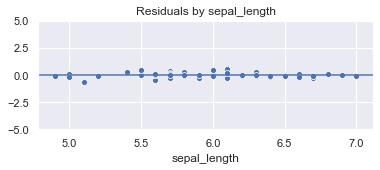

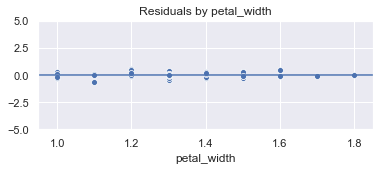

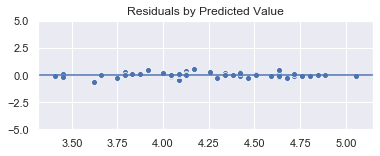

-1.9628743075372767e-15


In [34]:
for x in ('sepal_length','petal_width'):
    plt.figure(figsize=(6,2))
    sns.scatterplot(iris[x], lmprac2.resid)
    plt.title("Residuals by %s" % x)
    plt.ylim(-5, 5)
    #Put a horizontal line through the mean of the predictions.
    plt.axhline(np.mean(lmprac2.resid))
    plt.show()

plt.figure(figsize=(6,2))
sns.scatterplot(lmprac2.predict(), lmprac2.resid)
plt.title("Residuals by Predicted Value")
plt.ylim(-5, 5)
plt.axhline(np.mean(lmprac2.resid))
plt.show()

print(np.mean(lmprac2.resid))

### Additional notes for time series

In [35]:
#Setup
temp = pd.read_csv('../data/daily-min-temperatures-melbourne.csv', 
                 index_col="Date", parse_dates=["Date"])

#We can't use pandas datetimes in linear models.
temp['jdate'] = temp.index.to_julian_date()

temp.head()

,Temp,jdate
Date,,
1981-01-01,20.7,2444605.5
1981-01-02,17.9,2444606.5
1981-01-03,18.8,2444607.5
1981-01-04,14.6,2444608.5
1981-01-05,15.8,2444609.5


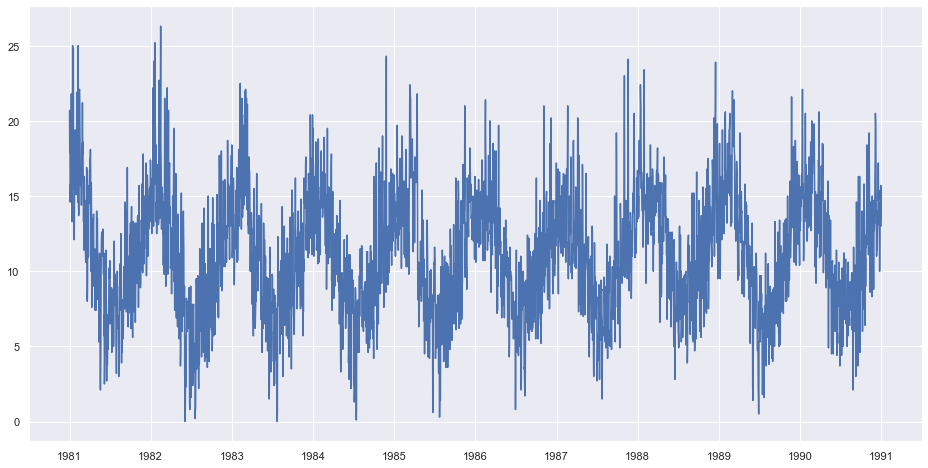

In [47]:
plt.figure(figsize=(16,8))
plt.plot(temp.Temp)
plt.show()

In [37]:
x = sm.add_constant(temp.jdate)
y = temp.Temp

lm = sm.OLS(y, x).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5431
Date:                Mon, 25 Nov 2019   Prob (F-statistic):              0.461
Time:                        16:52:28   Log-Likelihood:                -10303.
No. Observations:                3650   AIC:                         2.061e+04
Df Residuals:                    3648   BIC:                         2.062e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -104.0724    156.393     -0.665      0.506    -410.698     202.553
jdate       4.711e-05   6.39e-05      0.737      0.461   -7.82e-05       0.000
==============================================================================
Omnibus:                       19.219   Durbin-Watson:                   0.450
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.480
Skew:                           0.176   Prob(JB):                     5.89e-05
Kurtosis:                       2.940   Cond. No.                     5.68e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

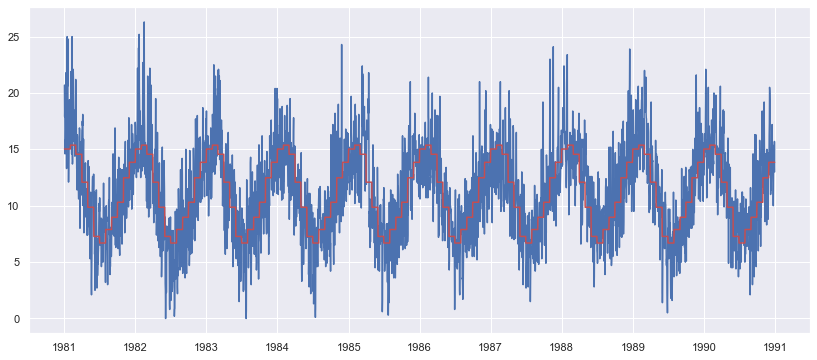

In [46]:
plt.figure(figsize=(14,6))
plt.plot(temp.Temp)
plt.plot(temp.index, lm.predict(), 'r-')
plt.show()

#### Seasonality

In [39]:
#Reset.
temp = pd.read_csv('../data/daily-min-temperatures-melbourne.csv', 
                 index_col="Date", parse_dates=["Date"])

In [40]:
from datetime import date
monthnames = [date(2000, x, 1).strftime('%B') for x in range(1, 13)]

months = pd.DataFrame({'month':pd.Categorical(temp.index.strftime('%B'), 
                                              categories=monthnames)}, index = temp.index)
months.month

Date
1981-01-01     January
1981-01-02     January
1981-01-03     January
1981-01-04     January
1981-01-05     January
1981-01-06     January
1981-01-07     January
1981-01-08     January
1981-01-09     January
1981-01-10     January
1981-01-11     January
1981-01-12     January
1981-01-13     January
1981-01-14     January
1981-01-15     January
1981-01-16     January
1981-01-17     January
1981-01-18     January
1981-01-19     January
1981-01-20     January
1981-01-21     January
1981-01-22     January
1981-01-23     January
1981-01-24     January
1981-01-25     January
1981-01-26     January
1981-01-27     January
1981-01-28     January
1981-01-29     January
1981-01-30     January
                ...   
1990-12-02    December
1990-12-03    December
1990-12-04    December
1990-12-05    December
1990-12-06    December
1990-12-07    December
1990-12-08    December
1990-12-09    December
1990-12-10    December
1990-12-11    December
1990-12-12    December
1990-12-13    December
1990-1

In [49]:


#List of month names.
months = pd.DataFrame({'month':temp.index.strftime('%B')}, index = temp.index)
months
#Make dummy columns for months.
#monthcols = pd.get_dummies(months, drop_first=True)
#monthcols

,month
Date,
1981-01-01,January
1981-01-02,January
1981-01-03,January
1981-01-04,January
1981-01-05,January
1981-01-06,January
1981-01-07,January
1981-01-08,January
1981-01-09,January


In [42]:
temp

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8
1981-01-07,15.8
1981-01-08,17.4
1981-01-09,21.8


In [43]:
#Add our dummy month columns to our dataset.
temp = pd.concat((temp, monthcols), axis=1)
temp.head()

,Temp,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
Date,,,,,,,,,,,,
1981-01-01,20.7,0,0,0,1,0,0,0,0,0,0,0
1981-01-02,17.9,0,0,0,1,0,0,0,0,0,0,0
1981-01-03,18.8,0,0,0,1,0,0,0,0,0,0,0
1981-01-04,14.6,0,0,0,1,0,0,0,0,0,0,0
1981-01-05,15.8,0,0,0,1,0,0,0,0,0,0,0


In [44]:
x = sm.add_constant(temp.iloc[:,1:])
y = temp.Temp

lm = sm.OLS(y, x).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     382.6
Date:                Mon, 25 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:55:58   Log-Likelihood:                -8900.7
No. Observations:                3650   AIC:                         1.783e+04
Df Residuals:                    3638   BIC:                         1.790e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.0883      0.160     75.404      0.000      11.774      12.403
month_August       -4.1970      0.225    -18.663      0.000      -4.638      -3.756
month_December      1.7636      0.225      7.830      0.000       1.322       2.205
month_February      3.2854      0.230     14.265      0.000       2.834       3.737
month_January       2.9420      0.225     13.082      0.000       2.501       3.383
month_July         -5.3958      0.225    -23.994      0.000      -5.837      -4.955
month_June         -4.8100      0.227    -21.216      0.000      -5.255      -4.365
month_March         2.4772      0.225     11.015      0.000       2.036       2.918
month_May          -2.2219      0.225     -9.880      0.000      -2.663      -1.781
month_November      0.3913      0.227      1.726      0.084      -0.053       0.836
month_October      -1.7790      0.225     -7.911      0.000      -2.220      -1.338
month_September    -3.1120      0.227    -13.726      0.000      -3.557      -2.667
==============================================================================
Omnibus:                       71.674   Durbin-Watson:                   0.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.316
Skew:                           0.323   Prob(JB):                     1.63e-17
Kurtosis:                       3.301   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### [`shift()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html)



In [45]:
#Reset.
temp = pd.read_csv('../data/daily-min-temperatures-melbourne.csv', 
                 index_col="Date", parse_dates=["Date"])


temp['temp_last'] = temp.Temp.shift(1)
temp['temp_next'] = temp.Temp.shift(-1)
temp['temp_diff'] = temp.Temp - temp.temp_last
temp.head()

,Temp,temp_last,temp_next,temp_diff
Date,,,,
1981-01-01,20.7,NaN,17.9,NaN
1981-01-02,17.9,20.7,18.8,-2.8
1981-01-03,18.8,17.9,14.6,0.9
1981-01-04,14.6,18.8,15.8,-4.2
1981-01-05,15.8,14.6,15.8,1.2


### Next week

Interactive visualization using Jupyter and [Voila](https://voila.readthedocs.io/en/stable/).